In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


In [3]:

# Load the Iris dataset
iris = load_iris()
iris_df = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names

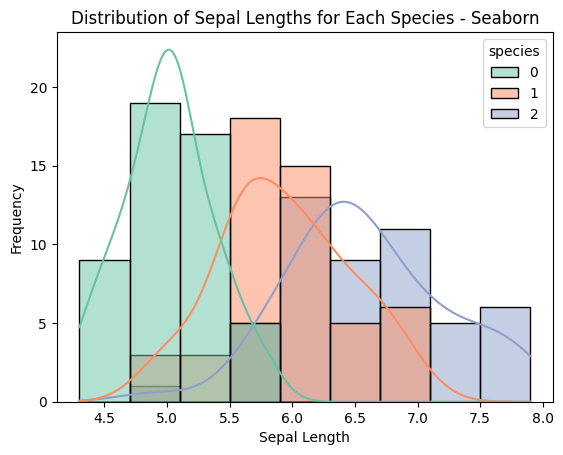

In [12]:
# Seaborn
# 1. Distribution of sepal lengths for each species
iris_sepal_df = pd.DataFrame(data=iris_df, columns=iris_feature_names)
iris_sepal_df['species'] = iris_target
sns.histplot(data=iris_sepal_df, x="sepal length (cm)", hue="species", kde=True, palette='Set2')
plt.title('Distribution of Sepal Lengths for Each Species - Seaborn')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()


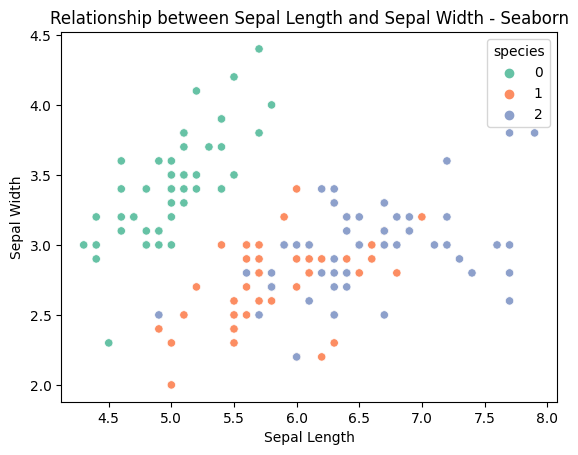

In [17]:
# 2. Relationship between sepal length and sepal width
sns.scatterplot(data=iris_sepal_df, x="sepal length (cm)",
                y="sepal width (cm)", hue="species", palette='Set2')
plt.title('Relationship between Sepal Length and Sepal Width - Seaborn')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [18]:
# Plotly
# 1. Relationship between petal length and petal width
fig = px.scatter(x=iris_df[:, 2], y=iris_df[:, 3], color=iris_target, 
      title="Relationship between Petal Length and Petal Width - Plotly",
      labels={'x': 'Petal Length', 'y': 'Petal Width', 'color': 'Species'})
fig.show()

In [19]:
#the relationship between sepal length, sepal width, and petal length of the Iris dataset 
#using 3D Scatter Plot of Iris Dataset

# Define colors for different species
species_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Map iris_target to colors
colors = [species_colors[i] for i in iris_target]

# Plotly 3D Scatter Plot
fig = go.Figure(data=go.Scatter3d(
    x=iris_df[:, 0],  # Sepal Length
    y=iris_df[:, 1],  # Sepal Width
    z=iris_df[:, 2],  # Petal Length
    mode='markers',
    marker=dict(
        size=8,
        color=colors,
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='Sepal Length',
        yaxis_title='Sepal Width',
        zaxis_title='Petal Length'
    ),
    title='3D Scatter Plot of Iris Dataset'
)

fig.show()

In [22]:
# Define colors for different species
species_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Map iris_target to colors
colors = [species_colors[i] for i in iris_target]

# Bokeh
output_notebook()  # For Jupyter Notebook
p = figure(title="Sepal Length vs. Petal Length - Bokeh",
           x_axis_label='Sepal Length', y_axis_label='Petal Length')

p.circle(x=iris_df[:, 0], y=iris_df[:, 2], fill_color=colors, legend_label='Species')

show(p)

Loading BokehJS ...

In [21]:
# 2. Distribution of petal widths
p = figure(title="Distribution of Petal Widths - Bokeh",
           x_axis_label='Petal Width', y_axis_label='Frequency')

hist, edges = np.histogram(iris_df[:, 3], bins=30)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color='skyblue', line_color='black')

show(p)